# Diseño de un modelo de optimización

Un país pequeño se encuentra en guerra y actualmente cuenta únicamente con dos fábricas activas para abastecer al ejército. Las prioridades estratégicas establecidas por el alto mando militar son la producción de armas, alimentos y municiones.

Los recursos disponibles permiten producir como máximo 150 armas, 600 unidades de alimento y 1200 municiones. La fábrica 1 produce por cada hora de operación 3 armas, 2 unidades de alimento y 1 munición, mientras que la fábrica 2 produce 1 arma, 3 unidades de alimento y 2 municiones por hora.

El costo de operación por hora es de 10 000 USD para la fábrica 1 y 7 000 USD para la fábrica 2. Para poder sostener el esfuerzo bélico, se requiere producir al menos 20 armas, 200 unidades de alimento y 150 municiones.

Además, por razones logísticas y estratégicas, se ha determinado que la fábrica 2 debe operar al menos el doble de horas que la fábrica 1.

El objetivo es determinar cuántas horas debe operar cada fábrica de forma que se minimice el costo total de producción, cumpliendo todas las restricciones establecidas.

\begin{align}
\mathbf{min}\quad z &= 10000x_1 + 7000x_2 \\[6pt]
\text{s.a.}\quad
\begin{cases}
3x_1 + x_2 \geq 20 & \text{(armas mínimas)}\\
3x_1 + x_2 \leq 150 & \text{(armas máximas)}\\[4pt]

2x_1 + 3x_2 \geq 200 & \text{(alimento mínimo)}\\
2x_1 + 3x_2 \leq 600 & \text{(alimento máximo)}\\[4pt]

x_1 + 2x_2 \geq 150 & \text{(municiones mínimas)}\\
x_1 + 2x_2 \leq 1200 & \text{(municiones máximas)}\\[4pt]

x_2 \geq 2x_1 & \text{(prioridad estratégica)}\\

x_1, x_2 \geq 0
\end{cases}
\end{align}


In [5]:
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

# Graficación

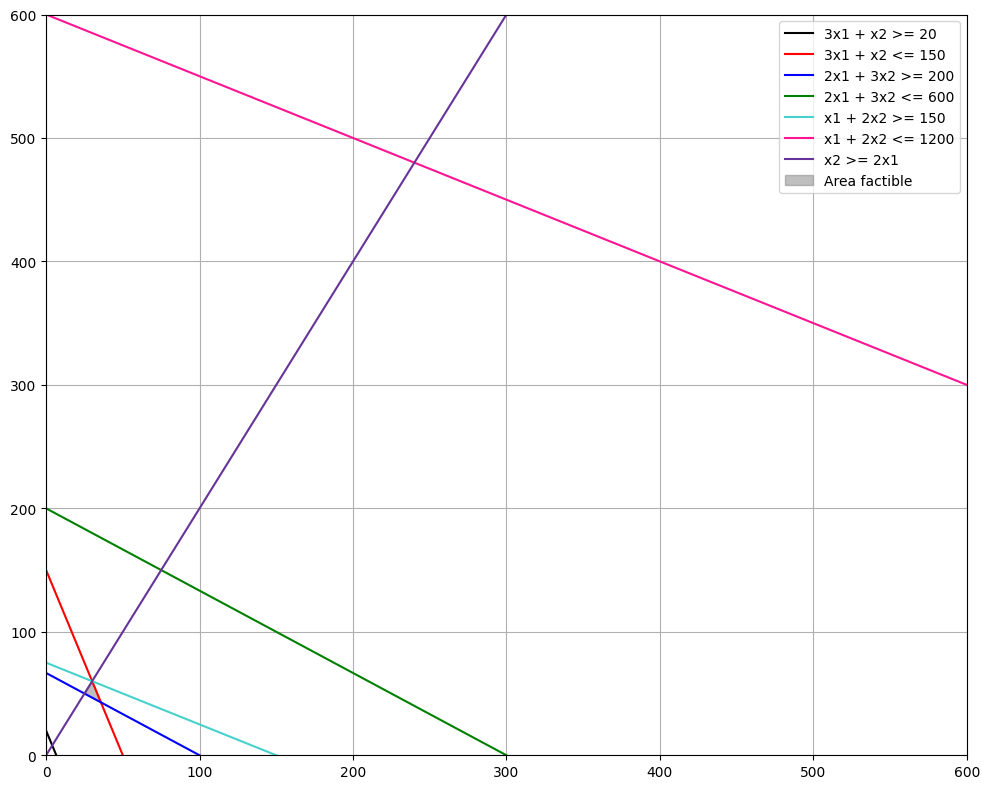

In [10]:
plt.figure(figsize=(10,8))

x1 = np.linspace(0,600,1000)

x2_con1 = 20 - 3 * x1
x2_con2 = 150 - 3 * x1
x2_con3 = (200 - 2 * x1) / 3
x2_con4 = (600 - 2 * x1) / 3
x2_con5 = (150 - x1) / 2
x2_con6 = (1200 - x1) / 2
x2_con7 = 2 * x1

plt.plot(x1,x2_con1,"black", label = "3x1 + x2 >= 20")
plt.plot(x1,x2_con2,"red", label = "3x1 + x2 <= 150")
plt.plot(x1,x2_con3,"blue", label = "2x1 + 3x2 >= 200")
plt.plot(x1,x2_con4,"green", label = "2x1 + 3x2 <= 600")
plt.plot(x1,x2_con5,"mediumturquoise", label = "x1 + 2x2 >= 150")
plt.plot(x1,x2_con6,"deeppink", label = "x1 + 2x2 <= 1200")
plt.plot(x1,x2_con7,"rebeccapurple", label = "x2 >= 2x1")

feasible1 = np.minimum(x2_con5,x2_con7)
feasible2 = np.minimum(feasible1, x2_con2)

plt.fill_between(x1, x2_con3, feasible2, where = (feasible2 >= x2_con3) ,color = "grey", alpha = 0.5, label = "Area factible")

plt.grid()
plt.legend()
plt.xlim(0,600)
plt.ylim(0,600)
plt.tight_layout()
plt.savefig("../presentation/plot.png")
plt.show()

# Solución

In [6]:
model = pyo.ConcreteModel()

model.x1 = pyo.Var(within = pyo.NonNegativeIntegers)
model.x2 = pyo.Var(within = pyo.NonNegativeIntegers)

model.obj = pyo.Objective(expr = 10000 * model.x1 + 7000 * model.x2, sense = pyo.minimize)

model.con1 = pyo.Constraint(expr = 3 * model.x1 + model.x2 >= 20)
model.con2 = pyo.Constraint(expr = 3 * model.x1 + model.x2 <= 150)
model.con3 = pyo.Constraint(expr = 2 * model.x1 + 3 * model.x2 >= 200)
model.con4 = pyo.Constraint(expr = 2 * model.x1 + 3 * model.x2 <= 600)
model.con5 = pyo.Constraint(expr = model.x1 + 2 * model.x2 >= 150)
model.con6 = pyo.Constraint(expr = model.x1 + 2 * model.x2 <= 1200)
model.con7 = pyo.Constraint(expr = model.x2 >= 2 * model.x1)

opt = pyo.SolverFactory("glpk")
results = opt.solve(model)
model.display()

Model unknown

  Variables:
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :  None : False : False : NonNegativeIntegers
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  75.0 :  None : False : False : NonNegativeIntegers

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 525000.0

  Constraints:
    con1 : Size=1
        Key  : Lower : Body : Upper
        None :  20.0 : 75.0 :  None
    con2 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 75.0 : 150.0
    con3 : Size=1
        Key  : Lower : Body  : Upper
        None : 200.0 : 225.0 :  None
    con4 : Size=1
        Key  : Lower : Body  : Upper
        None :  None : 225.0 : 600.0
    con5 : Size=1
        Key  : Lower : Body  : Upper
        None : 150.0 : 150.0 :  None
    con6 : Size=1
        Key  : Lower : Body  : U